Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [4]:
!pip install tensorflow
!pip install keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 57.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 76.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 75.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 53.3 MB/s eta 0:00:

In [7]:
import tensorflow as tf

In [8]:
from keras import __version__ as keras_version

# Print versions
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras_version)

TensorFlow version: 2.15.0
Keras version: 2.15.0


Q2.Load the Wine Quality dataset and explore its dimensions. 

In [9]:
import pandas as pd

wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [10]:
# Display the dimensions of the dataset
print("Dimensions of the Wine Quality dataset:", wine_data.shape)

Dimensions of the Wine Quality dataset: (1599, 12)


Q3. Check for null values, identify categorical variables, and encode them.

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [12]:
print("Null values in the dataset:\n", wine_data.isnull().sum())

Null values in the dataset:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [13]:
categorical_cols = wine_data.select_dtypes(include=['object']).columns
print("Categorical variables:", categorical_cols)


Categorical variables: Index([], dtype='object')


In [14]:
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    wine_data[col] = label_encoders[col].fit_transform(wine_data[col])

In [15]:
# Display the encoded dataset
print("\nEncoded dataset:\n", wine_data.head())


Encoded dataset:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2

Q4. Separate the features and target variables from the dataset.

In [16]:
X = wine_data.drop(columns=['quality'])
y = wine_data['quality'] 


In [17]:
print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (1599, 11)
Shape of target (y): (1599,)


Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)
print("Training set (X_train) shape:", X_train.shape)
print("Validation set (X_val) shape:", X_val.shape)
print("Test set (X_test) shape:", X_test.shape)

Training set (X_train) shape: (959, 11)
Validation set (X_val) shape: (320, 11)
Test set (X_test) shape: (320, 11)


Q6. Scale the dataset using an appropriate scaling technique.

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
# Initialize the scaler
scaler = StandardScaler()

In [24]:
# Fit the scaler on the training set and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

In [25]:
# Transform the validation and test sets using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Q7. Design and implement at least two hidden layers and an output layer for the binary categorical
variables.

In [26]:
from keras.models import Sequential
from keras.layers import Dense

In [28]:
model = Sequential()

In [29]:
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))


In [31]:
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3937 (15.38 KB)
Trainable params: 3937 (15.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Q9. Print the summary of the model architecture.

In [33]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3937 (15.38 KB)
Trainable params: 3937 (15.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Q10.Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.

In [36]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Q11. Compile the model with the specified loss function, optimizer, and metrics.

In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Q12. Fit the model to the training data using appropriate batch size and number of epochs.

In [39]:
batch_size = 64
epochs = 10
history = model.fit(X_train_scaled, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val_scaled, y_val))

Epoch 1/10
15/15 [==============================] - 1s 20ms/step - loss: -1.5236 - accuracy: 0.0000e+00 - val_loss: -3.7925 - val_accuracy: 0.0000e+00
Epoch 2/10
15/15 [==============================] - 0s 5ms/step - loss: -7.1784 - accuracy: 0.0000e+00 - val_loss: -11.6005 - val_accuracy: 0.0000e+00
Epoch 3/10
15/15 [==============================] - 0s 5ms/step - loss: -19.2207 - accuracy: 0.0000e+00 - val_loss: -29.2457 - val_accuracy: 0.0000e+00
Epoch 4/10
15/15 [==============================] - 0s 5ms/step - loss: -46.7475 - accuracy: 0.0000e+00 - val_loss: -68.9179 - val_accuracy: 0.0000e+00
Epoch 5/10
15/15 [==============================] - 0s 5ms/step - loss: -106.6929 - accuracy: 0.0000e+00 - val_loss: -151.2713 - val_accuracy: 0.0000e+00
Epoch 6/10
15/15 [==============================] - 0s 5ms/step - loss: -225.7177 - accuracy: 0.0000e+00 - val_loss: -305.9903 - val_accuracy: 0.0000e+00
Epoch 7/10
15/15 [==============================] - 0s 5ms/step - loss: -440.8590 - ac

Q13. Obtain the model's parameters (weights and biases).

In [48]:
model_parameters = []

for layer in model.layers:
    layer_params = layer.get_weights()
    model_parameters.append(layer_params)

for i, layer_params in enumerate(model_parameters):
    print(f"Layer {i + 1}:")
    for j, param in enumerate(layer_params):
        print(f"Parameter {j + 1}:")
        print(param)
        print()

Layer 1:
Parameter 1:
[[ 2.52917826e-01 -1.15187526e-01 -2.01005295e-01 -3.60404253e-01
   3.69068421e-02  3.18791330e-01  1.07980005e-01  3.80163729e-01
   4.41657633e-01  1.31174341e-01 -2.83771425e-01  3.82287323e-01
  -2.34095961e-01  3.28613967e-01  2.57564068e-01  1.27224848e-01
   2.48457968e-01  6.34301156e-02  2.48699099e-01  1.78208634e-01
  -4.07866299e-01 -2.60161638e-01  2.44815856e-01  4.72173452e-01
   3.27452540e-01 -4.38880593e-01  3.19827259e-01 -4.49685901e-01
   4.03653890e-01  4.26051140e-01 -1.44412428e-01 -4.62359041e-02
  -3.07349503e-01  3.99096668e-01  5.18540442e-01 -2.78225303e-01
   3.22546512e-01  4.18366671e-01 -2.90812433e-01 -5.92024401e-02
   4.67500508e-01  3.82789373e-01 -9.30385366e-02  4.68781292e-01
  -4.64225799e-01 -2.30360359e-01 -2.46949598e-01  9.57620293e-02
  -1.91203088e-01  1.75386205e-01  2.82787532e-01  4.15006548e-01
  -3.95045191e-01 -3.91892880e-01  5.05606830e-01 -2.96405792e-01
  -3.36672813e-01  1.48477346e-01  2.80658901e-01  5.8

Q14. Store the model's training history as a Pandas DataFrame.

In [49]:
import pandas as pd

# Convert the history object to a DataFrame
history_df = pd.DataFrame(history.history)

# Display the DataFrame
print(history_df)

          loss  accuracy     val_loss  val_accuracy
0    -1.523615       0.0    -3.792528           0.0
1    -7.178351       0.0   -11.600534           0.0
2   -19.220707       0.0   -29.245691           0.0
3   -46.747540       0.0   -68.917885           0.0
4  -106.692894       0.0  -151.271332           0.0
5  -225.717682       0.0  -305.990295           0.0
6  -440.859039       0.0  -576.159973           0.0
7  -807.345581       0.0 -1022.359497           0.0
8 -1396.046021       0.0 -1720.033813           0.0
9 -2287.811035       0.0 -2757.139404           0.0


Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

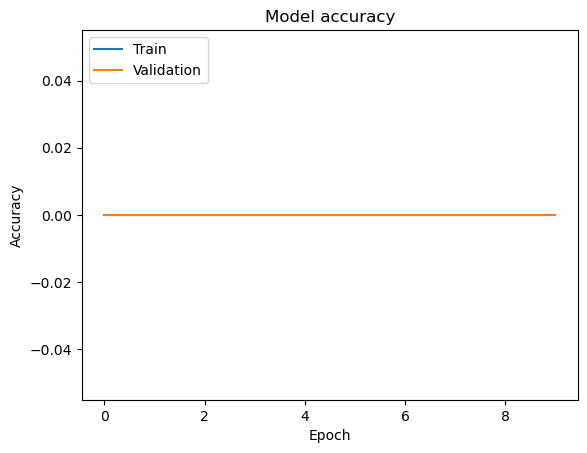

In [50]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

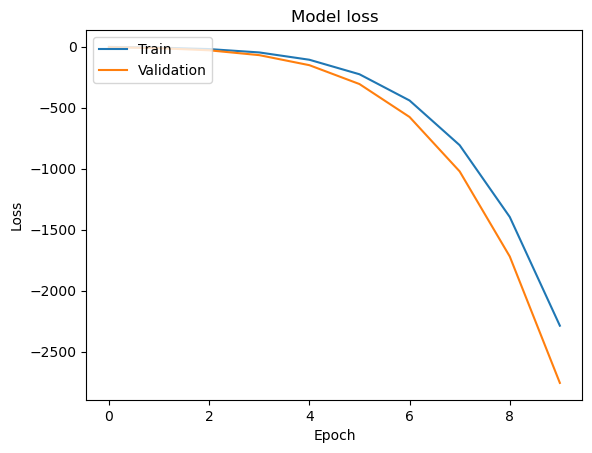

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()